In [1]:
%load_ext autoreload
%autoreload 2

## imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from pylamp.loss.losses import RMSELoss
from pylamp.neural.layers import Linear
from pylamp.optim.optimizer import SGD, Optim
from pylamp.utils.plotter import Display



## Loading data

You can find the dataset on [kaggle](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression)

In [3]:
# Load the CSV file
file_path = './data/salary/Salary_dataset.csv'
data = pd.read_csv(file_path, index_col=0)

In [4]:
data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Preprocessing data

In [5]:
# Separate features and target
X = data.drop('Salary', axis=1).values
y = data['Salary'].values.reshape(-1, 1)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')


X shape: (30, 1)
y shape: (30, 1)


## Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the model

In [7]:


input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Create the model
model = Linear(input_size=input_size, output_size=output_size, use_bias=True)

loss_func = RMSELoss()
optimizer = Optim(model,loss_func,1e-1)
batch_size = 1
epochs = 6000
losses = SGD(optimizer,X_train, y_train, batch_size,epochs,verbose=True)

Epoch 1/6000, Average Loss: 74197.19550026867
Epoch 601/6000, Average Loss: 65143.49925027005
Epoch 1201/6000, Average Loss: 56088.973833611606
Epoch 1801/6000, Average Loss: 47035.44175028004
Epoch 2401/6000, Average Loss: 37981.28466691378
Epoch 3001/6000, Average Loss: 28927.41341688084
Epoch 3601/6000, Average Loss: 19872.95883351457
Epoch 4201/6000, Average Loss: 10819.650500148304
Epoch 4801/6000, Average Loss: 6378.742023132672
Epoch 5401/6000, Average Loss: 6434.890442412481
Training finished.


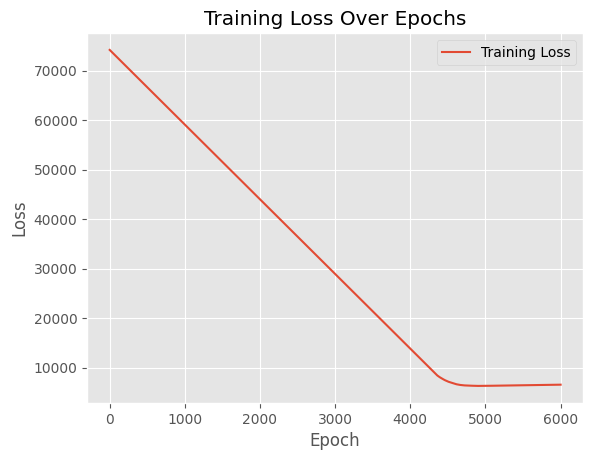

In [8]:
Display().plot_loss(losses)

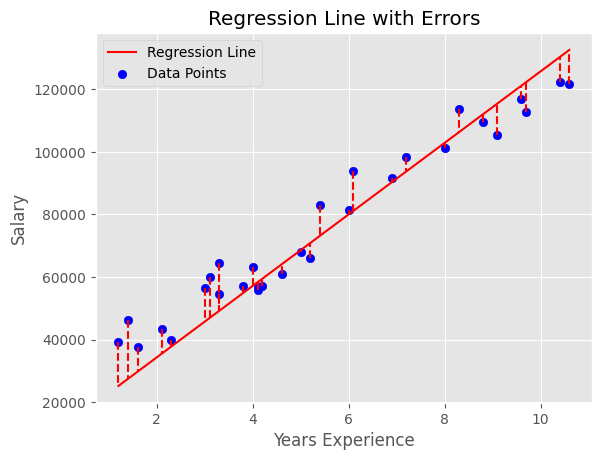

In [9]:
# Calculate predictions
y_pred = X * model.parameters['weights'].reshape(-1)[0] + model.parameters['bias'].reshape(-1)[0]

# Define min and max of X for plotting the regression line
x_min, x_max = X.min(), X.max()
xs = np.linspace(x_min, x_max, 2)
ys = xs * model.parameters['weights'].reshape(-1)[0] + model.parameters['bias'].reshape(-1)[0]

# Plot the regression line
plt.plot(xs, ys, 'r-', label='Regression Line')

# Scatter plot the original data points
plt.scatter(X, y, color='blue',label='Data Points')

# Plot vertical lines from data points to regression line
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], 'r--')

# Adding labels and title
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Regression Line with Errors')
plt.legend()

# Display the plot
plt.show()


In [10]:
# Evaluate the model on the test set
y_test_pred = model.forward(X_test)
rmse_test = RMSELoss().forward(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test RMSE: {rmse_test}')
print(f'Test R^2: {r2_test}')


Test RMSE: 9013.005878395907
Test R^2: 0.8409653091719467
